In [56]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

ssr_dataset = pd.read_csv('../data/results.csv', sep=',')
ssr_dataset_II = pd.read_csv('../data/results_II.csv', sep=',')
ssr_dataset_III = pd.read_csv('../data/results_III.csv', sep=',')
ssr_dataset_IV = pd.read_csv('../data/results_IV.csv', sep=',')
ssr_dataset_V = pd.read_csv('../data/results_V.csv', sep=',')
ssr_dataset_VI = pd.read_csv('../data/results_VI.csv', sep=',')
ssr_dataset_VII = pd.read_csv('../data/results_VII.csv', sep=',')


datasets =	{
  "Normal": ssr_dataset,
  # "only teasers": ssr_dataset_II,
  "no images": ssr_dataset_III,
  # "only recommendations": ssr_dataset_IV,
  # "no-cache": ssr_dataset_V,
  "slim-pkg": ssr_dataset_VI,
  "teasers MFE": ssr_dataset_VII

}

ssr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idx          20 non-null     int64  
 1   site         20 non-null     object 
 2   date         20 non-null     object 
 3   time         20 non-null     object 
 4   navTime      20 non-null     int64  
 5   totalTime    20 non-null     int64  
 6   lcp          20 non-null     float64
 7   fcp          20 non-null     float64
 8   ttfb         20 non-null     float64
 9   tbt          20 non-null     int64  
 10  tti          20 non-null     float64
 11  longTasks    20 non-null     int64  
 12  longestTask  20 non-null     int64  
 13  error        0 non-null      float64
dtypes: float64(5), int64(6), object(3)
memory usage: 2.3+ KB


## Comparing the datasets

This table shows the overal metrics of the 2 paradigms and their major differences.

In [57]:
features = ['navTime','totalTime','lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longTasks', 'longestTask']
headers = ["feature","dataset","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  for d in datasets:
    report.append([
        f,
        d,
        datasets[d][f].size,
        datasets[d][f].min(),
        datasets[d][f].quantile(0.25),
        datasets[d][f].mean(),
        datasets[d][f].median(),
        datasets[d][f].quantile(0.75),
        datasets[d][f].max(),
        datasets[d][f].std(),
    ])

pd.DataFrame(report, columns=headers)

,feature,dataset,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,Normal,20,6078.00,6106.00,6133.35,6119.00,6130.50,6471.00,82.08
1,navTime,no images,20,5475.00,5484.25,5491.60,5491.00,5500.00,5517.00,11.77
2,navTime,slim-pkg,20,4634.00,4647.00,4673.75,4657.00,4672.25,4947.00,66.21
3,navTime,teasers MFE,20,3556.00,3566.75,3574.10,3571.00,3576.25,3645.00,18.33
4,totalTime,Normal,20,11087.00,11117.00,11143.90,11128.50,11141.25,11487.00,83.29
5,totalTime,no images,20,10485.00,10496.50,10503.35,10502.00,10511.00,10528.00,12.05
6,totalTime,slim-pkg,20,9644.00,9658.00,9684.95,9668.00,9683.00,9964.00,67.62
7,totalTime,teasers MFE,20,8566.00,8579.50,8585.95,8582.00,8588.00,8663.00,19.77
8,lcp,Normal,20,3343.80,3620.95,3744.22,3674.85,3853.85,4481.30,234.81
9,lcp,no images,20,2122.00,2154.20,2168.88,2168.80,2185.30,2252.60,29.14


The following boxplots will show the outliers and visualizes the overal differences between the paradigms

<module 'matplotlib.pyplot' from '/Users/auke/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

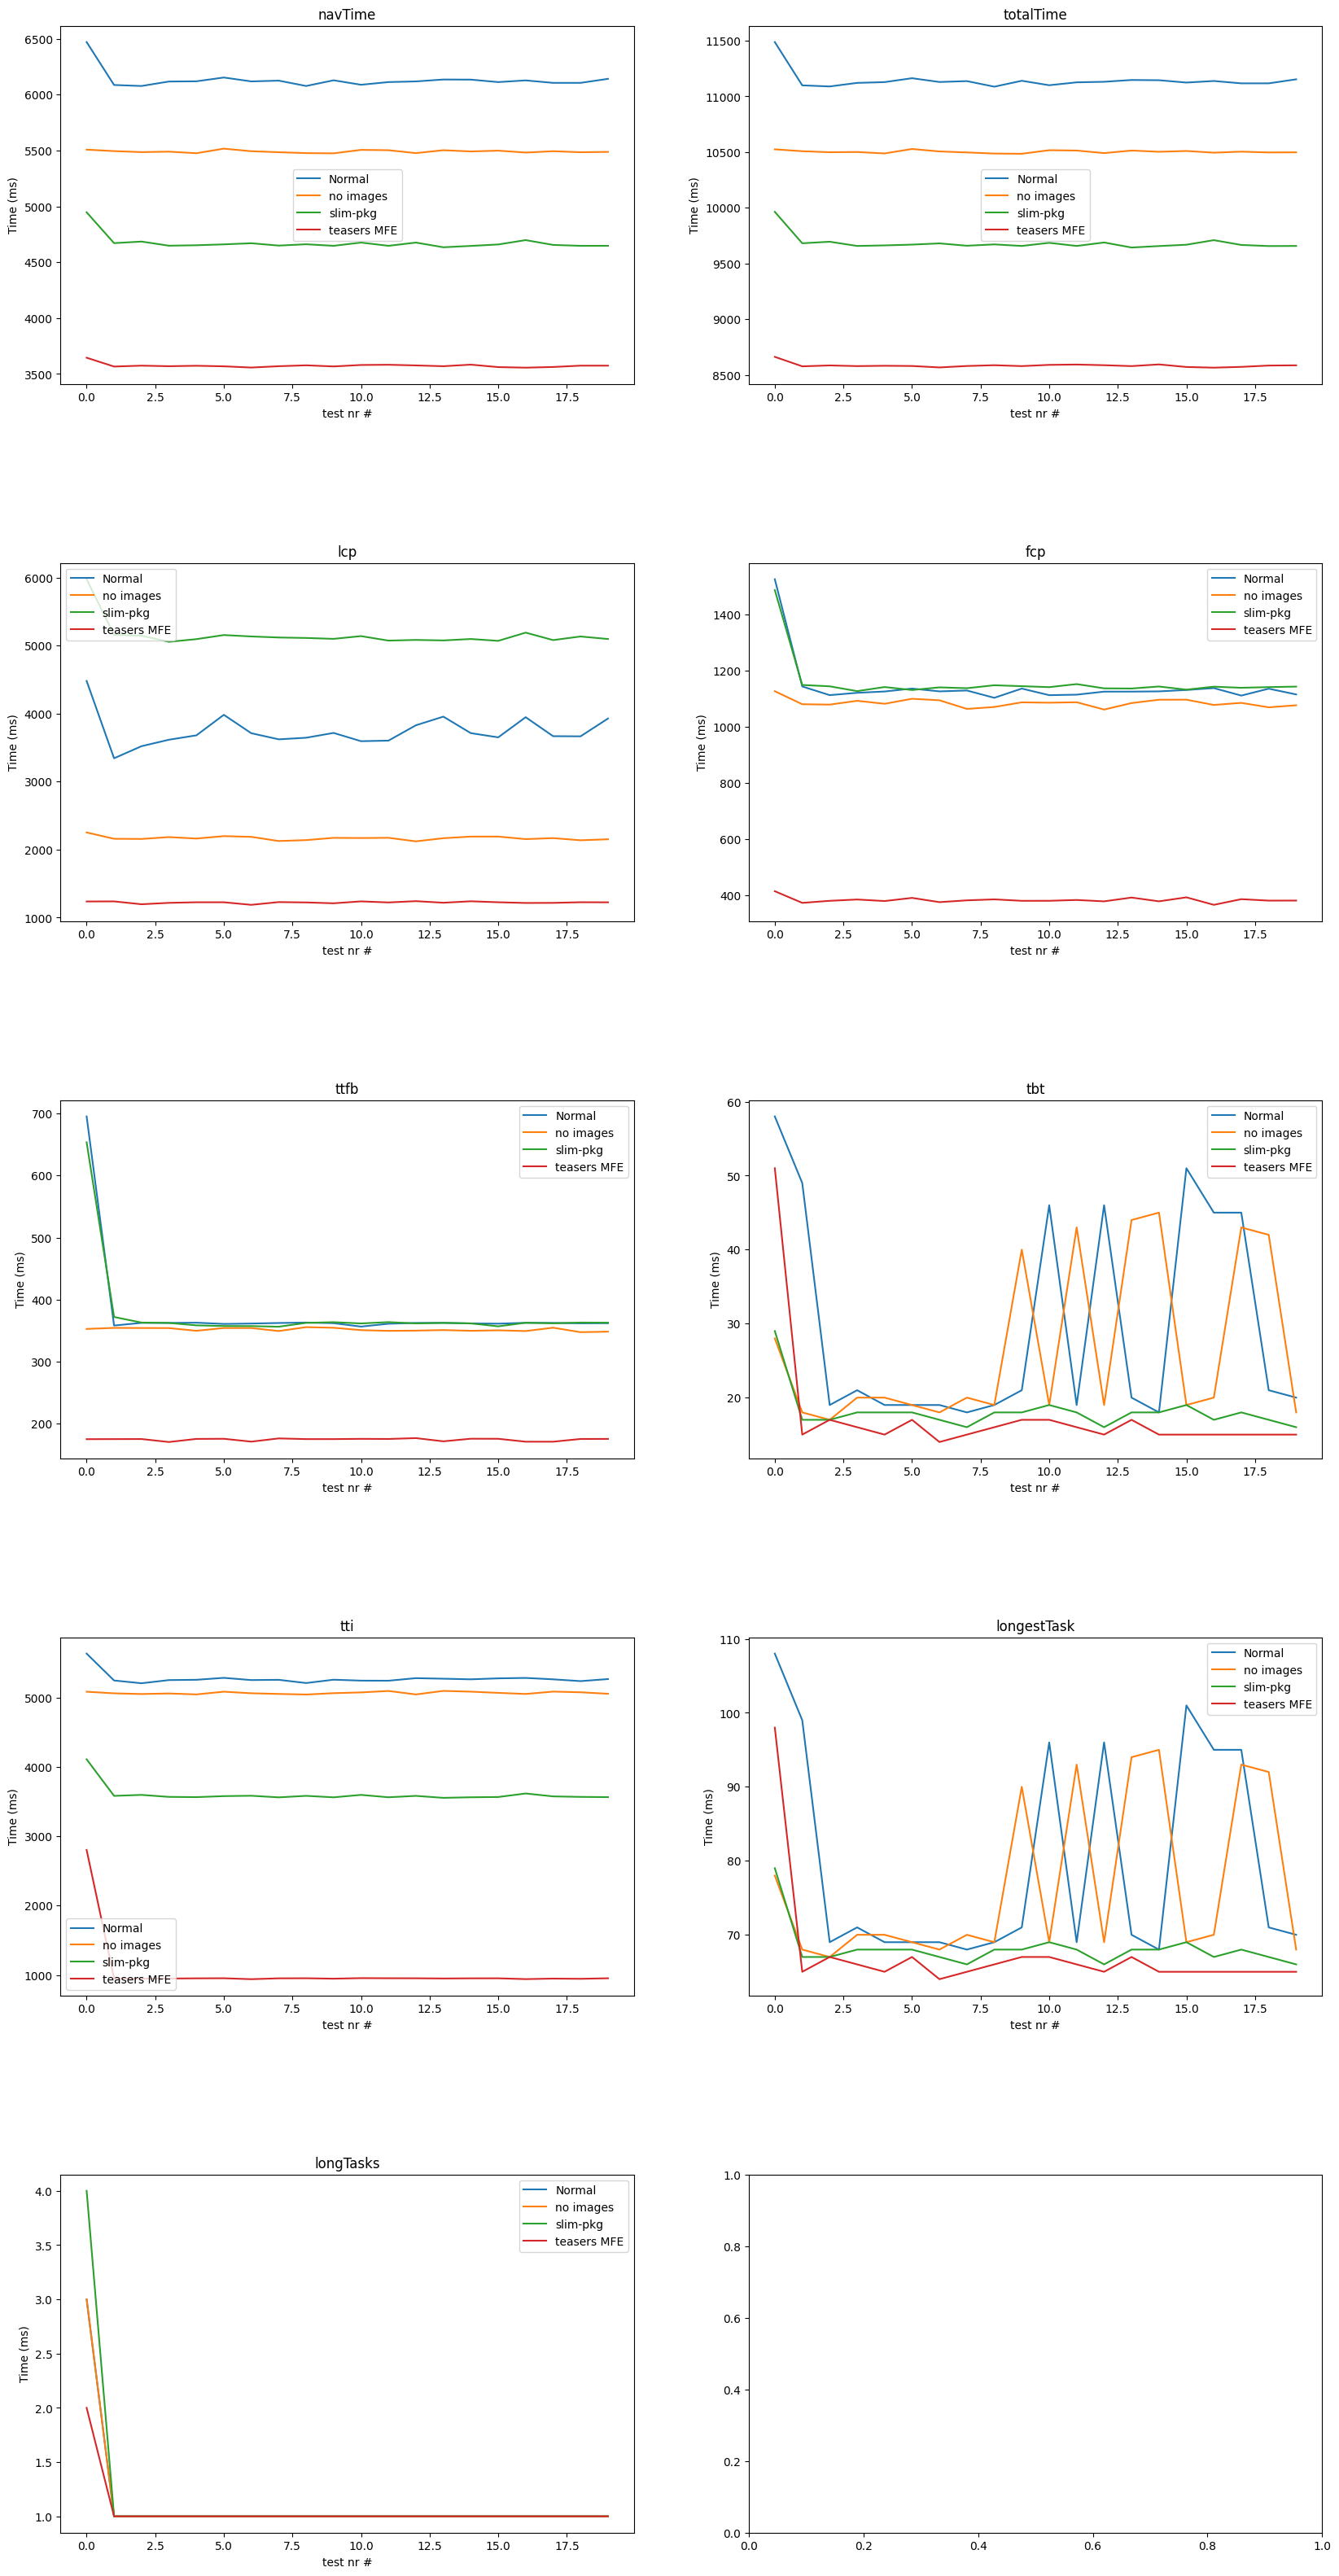

In [58]:
def ceildiv(a, b): return -(a // -b)

def plot_line_graph(feature, loc):
    for d in datasets:
        loc.plot(datasets[d][feature], label=d)
    
    loc.set_title(feature)
    loc.set_ylabel('Time (ms)') 
    loc.set_xlabel('test nr #') 

    loc.legend()
    


def graphs(plot_func, features,cols=2, height=8):
    rows = ceildiv(len(features), cols)
    _, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, height*rows))
    plt.subplots_adjust(hspace=0.5)
    for i, feature in enumerate(features):
        loc = axes[i // cols, i % cols] if rows > 1 and cols > 1 else axes[i % cols]
        plot_func(feature, loc)
    return plt

graphs(plot_line_graph, ['navTime','totalTime','lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks'])

In [59]:
ssr_details = pd.read_csv('../data/details.csv', sep=',')
ssr_details.head(44)

,idx,site,date,time,type,start,end,duration,name,element,url,id,loadTime,renderTime
0,1,http://localhost:8080/,2024-12-6,12:50:17,LCP,1524.90,4481.30,2956.40,-1,ref: <Node>,http://localhost:8080/img/scene/500/classics.webp,NaN,1431.50,1524.90
1,1,http://localhost:8080/,2024-12-6,12:50:17,longTask,1423.20,1475.20,52.00,unknown,-1,-1,-1.00,-1.00,-1.00
2,1,http://localhost:8080/,2024-12-6,12:50:17,longTask,1476.40,1529.40,53.00,self,-1,-1,-1.00,-1.00,-1.00
3,1,http://localhost:8080/,2024-12-6,12:50:17,longTask,5525.00,5633.00,108.00,self,-1,-1,-1.00,-1.00,-1.00
4,2,http://localhost:8080/,2024-12-6,12:50:29,LCP,1143.20,3343.80,2200.60,-1,ref: <Node>,http://localhost:8080/img/scene/500/classics.webp,NaN,1057.40,1143.20
5,2,http://localhost:8080/,2024-12-6,12:50:29,longTask,5146.70,5245.70,99.00,self,-1,-1,-1.00,-1.00,-1.00
6,3,http://localhost:8080/,2024-12-6,12:50:41,LCP,1179.00,3521.40,2342.40,-1,ref: <Node>,http://localhost:8080/img/scene/500/autonomous...,NaN,1163.40,1179.00
7,3,http://localhost:8080/,2024-12-6,12:50:41,longTask,5136.80,5205.80,69.00,self,-1,-1,-1.00,-1.00,-1.00
8,4,http://localhost:8080/,2024-12-6,12:50:52,LCP,1212.30,3616.60,2404.30,-1,ref: <Node>,http://localhost:8080/img/scene/500/autonomous...,NaN,1192.00,1212.30
9,4,http://localhost:8080/,2024-12-6,12:50:52,longTask,5180.40,5251.40,71.00,self,-1,-1,-1.00,-1.00,-1.00
